In [17]:
import sys
import os
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath('assessments'))))
from analyser import *

In [18]:
hw = Test('data/partial_binomial.csv')

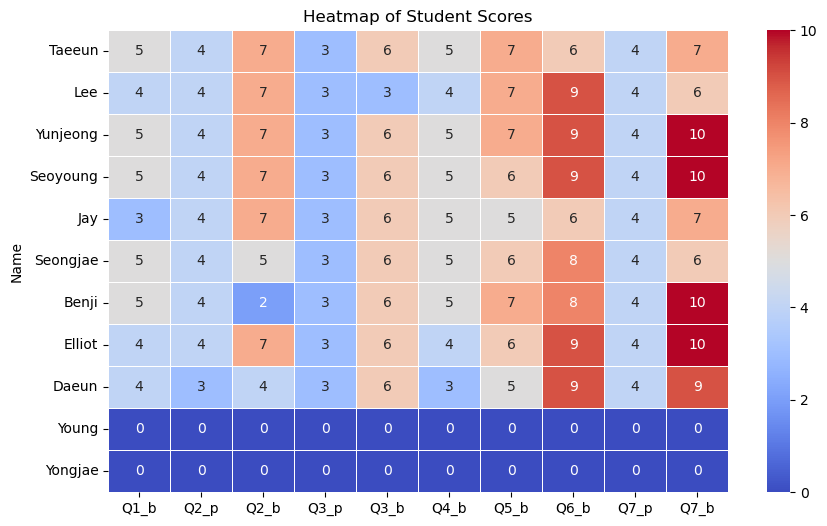

In [19]:
heatmap_data = hw.mark_table.set_index("Name")
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap of Student Scores")
plt.show()

In [20]:
melted = hw.marks(norm=True,to_one=False)

In [21]:
partial = melted[melted['Part'].str.contains('p',na=False)]
binomial = melted[melted['Part'].str.contains('b',na=False)]

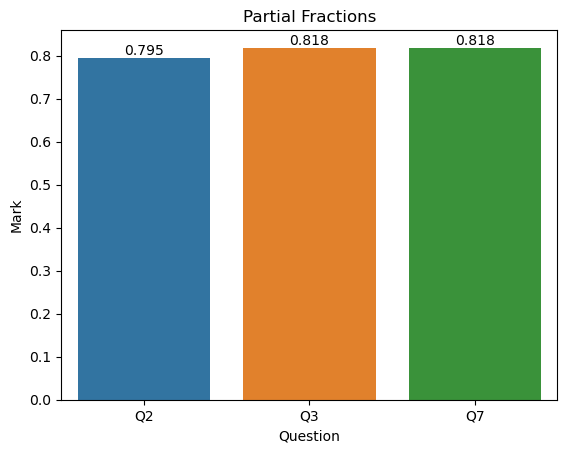

In [22]:
ax = sns.barplot(data=partial,x='Question',y='Mark',hue='Question', errorbar=None)
for container in ax.containers:
    labels = [f'{v.get_height():.3g}' for v in container]  # Round to 3 significant figures
    ax.bar_label(container, labels=labels, fontsize=10)
plt.title('Partial Fractions')
plt.savefig('figures/p4_ch2.png',dpi=300)

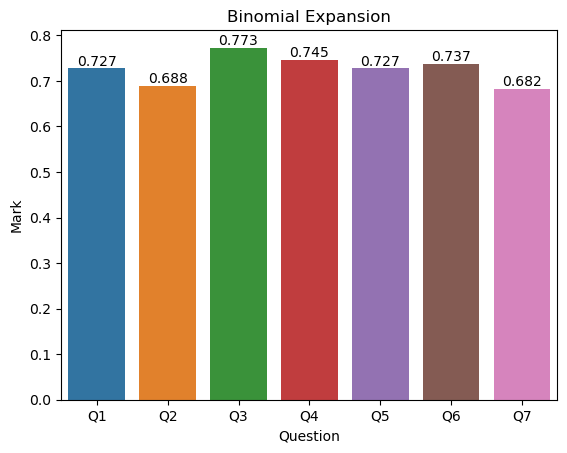

In [23]:
ax = sns.barplot(data=binomial,x='Question',y='Mark', hue='Question', errorbar=None)
for container in ax.containers:
    labels = [f'{v.get_height():.3g}' for v in container]  # Round to 3 significant figures
    ax.bar_label(container, labels=labels, fontsize=10)
plt.title('Binomial Expansion')
plt.savefig('figures/p4_ch4.png',dpi=300)

In [24]:
raw = hw.marks()

In [25]:
#total for partial fractions
partial_r = raw[raw['Part'].str.contains('p')]
binomial_r = raw[raw['Part'].str.contains('b')]

In [26]:
sum_partial = partial_r.groupby(['Name']).Mark.sum().divide(11).reset_index()
sum_binomial = binomial_r.groupby(['Name']).Mark.sum().divide(49).reset_index()

In [27]:
print('Partial Fractions')
print(sum_partial)

Partial Fractions
        Name      Mark
0      Benji  1.000000
1      Daeun  0.909091
2     Elliot  1.000000
3        Jay  1.000000
4        Lee  1.000000
5   Seongjae  1.000000
6   Seoyoung  1.000000
7     Taeeun  1.000000
8    Yongjae  0.000000
9      Young  0.000000
10  Yunjeong  1.000000


In [28]:
print('Binomials')
print(sum_binomial)

Binomials
        Name      Mark
0      Benji  0.877551
1      Daeun  0.816327
2     Elliot  0.938776
3        Jay  0.795918
4        Lee  0.816327
5   Seongjae  0.836735
6   Seoyoung  0.979592
7     Taeeun  0.877551
8    Yongjae  0.000000
9      Young  0.000000
10  Yunjeong  1.000000


In [29]:
print(hw.total_marks_table[['Name','Total']])


        Name  Total
1     Taeeun     54
2        Lee     51
3   Yunjeong     60
4   Seoyoung     59
5        Jay     50
6   Seongjae     52
7      Benji     54
8     Elliot     57
9      Daeun     50
10     Young      0
11   Yongjae      0


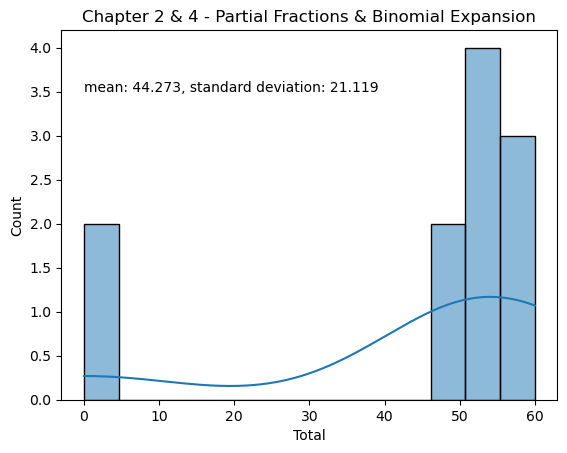

In [30]:
hist = sns.histplot(hw.total_marks_table, x = 'Total',kde=True)
data = f'mean: %.3f, standard deviation: %.3f'%(np.mean(hw.total_marks_table['Total']),np.std(hw.total_marks_table['Total']))
hist.set_title('Chapter 2 & 4 - Partial Fractions & Binomial Expansion')
hist.annotate(data, (0,3.5))
plt.savefig('figures/Chapter 2 & 4 - Partial Fractions & Binomial Expansion.png',dpi=300)